<a href="https://colab.research.google.com/github/Erik9892/microcredentialWinter2022/blob/week-3/Ei_Day14_GroupDecision_trees_and_Random_Forest_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 4.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [ ]:
# as usually import the library 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.shape

(9578, 14)

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### may have to drop not.fully.paid, installment
### or test seperately to see if there is a change in the machine learning

In [ ]:
df_2 = df.drop(['installment','not.fully.paid'], axis = 1 )
df_2.head()

,credit.policy,purpose,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [ ]:
df_2.describe()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.396245,0.026847,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.000000,0.060000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140700,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.216400,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB


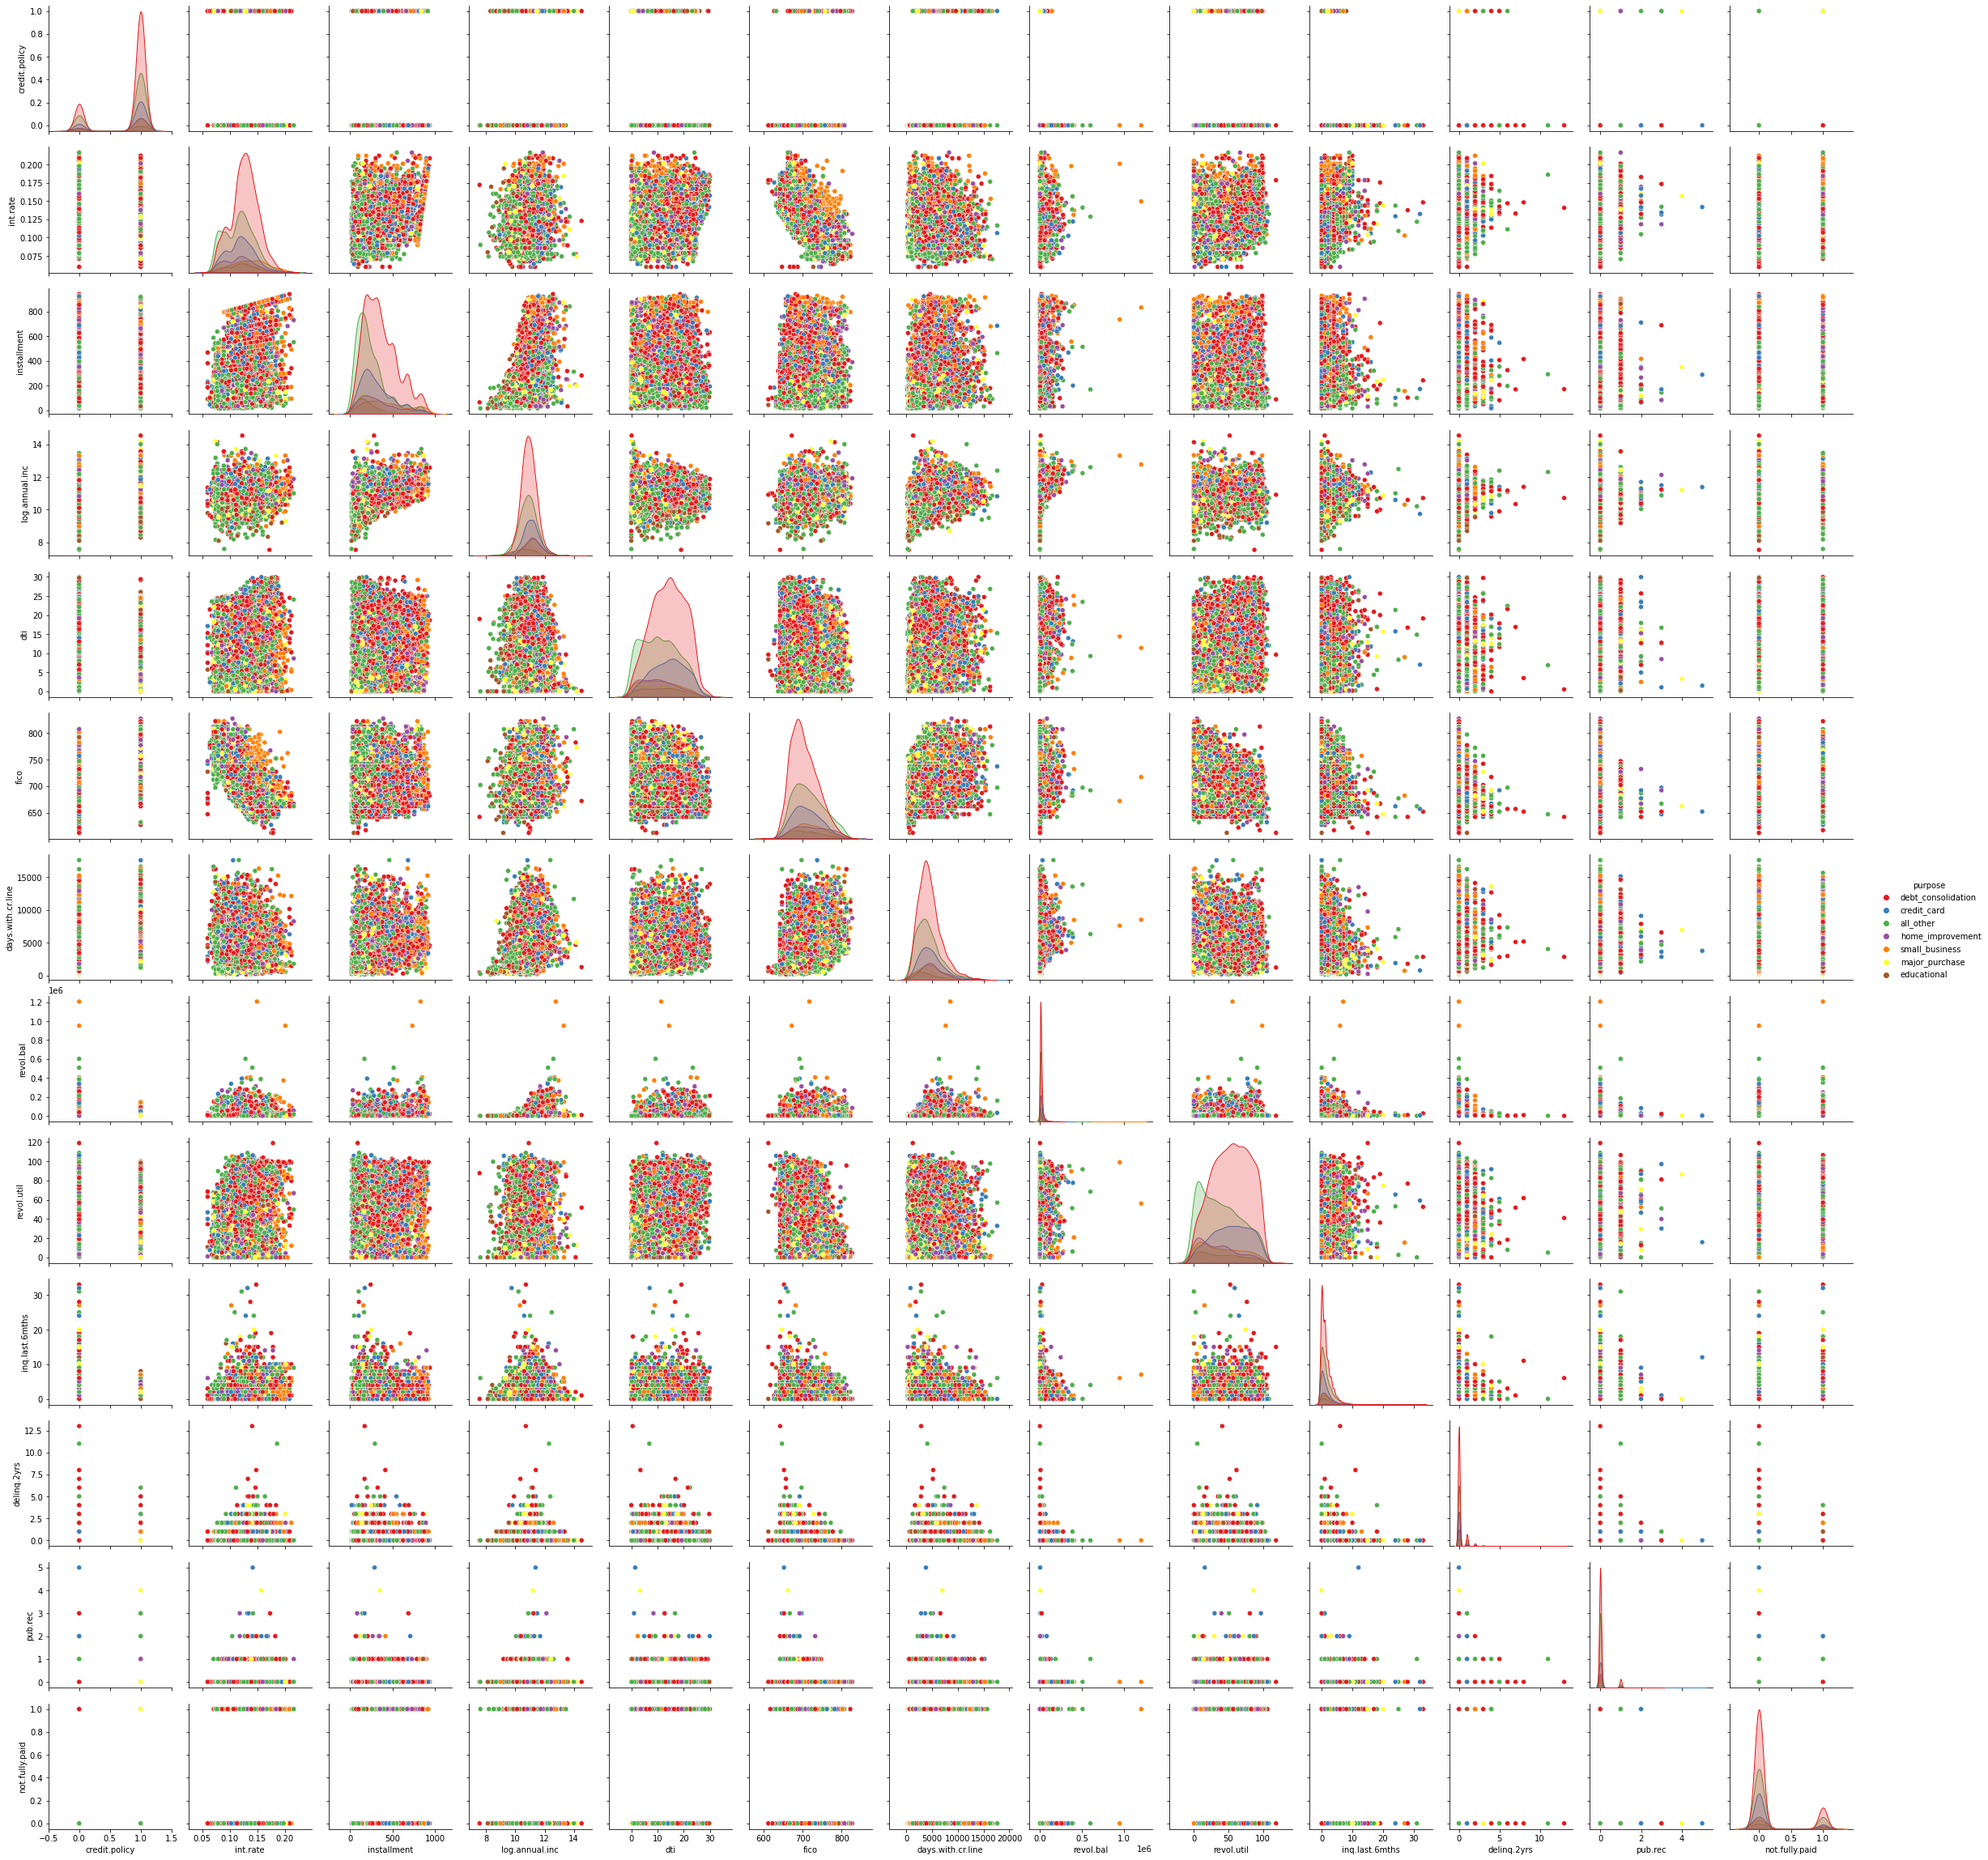

In [ ]:
# creating pair plot
sns.pairplot(df,hue='purpose', palette='Set1')

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X is our feature selection, so we do not include our predictor
# y is our predictor
X = df.drop('purpose',axis=1)
y = df['purpose']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#vDecision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predicition and Evaluation

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.33      0.33      0.33       685
       credit_card       0.16      0.18      0.17       374
debt_consolidation       0.51      0.49      0.50      1182
       educational       0.09      0.10      0.09        97
  home_improvement       0.09      0.08      0.09       202
    major_purchase       0.10      0.10      0.10       143
    small_business       0.21      0.19      0.20       191

         micro avg       0.33      0.33      0.33      2874
         macro avg       0.21      0.21      0.21      2874
      weighted avg       0.34      0.33      0.34      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[229  84 202  42  52  44  32]
 [ 71  69 169  11  24  13  17]
 [216 185 579  33  61  43  65]
 [ 31  10  27  10  12   3   4]
 [ 61  30  62  10  17  11  11]
 [ 48  16  36   5  13  14  11]
 [ 40  28  53   5  15  13  37]]


# Tree Visualization

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# RANDOM FORESTES

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rfc_pred))

#insight 2

So in comparison to decision trees There was an improvement in precision for debt_consolidation and small_business

The algorithim is able to accurately predict those two types of loans 51% and 55% of the time respectively.

We had a trade off though, with no ability to predict a educational or major_purchase loan

In [ ]:
print(classification_report(y_test, rfc_pred))

In [ ]:
# increasing trees to 500
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

# insight 3

When the Random forest was increased to have 500 trees, we were able to see a dramatic improvement in educational loan accuracy. Which is at 100%

small_business took an accuracy hit by 4% debt_consolidation remained the same. all_other improved by 1% credit_card had a decrease home_improvement had an increase major_purchase remains at 0%

In [ ]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

         all_other       0.41      0.52      0.45       685
       credit_card       0.25      0.04      0.07       374
debt_consolidation       0.52      0.82      0.64      1182
       educational       0.00      0.00      0.00        97
  home_improvement       0.05      0.00      0.01       202
    major_purchase       0.50      0.01      0.01       143
    small_business       0.59      0.17      0.26       191

         micro avg       0.48      0.48      0.48      2874
         macro avg       0.33      0.22      0.21      2874
      weighted avg       0.41      0.48      0.40      2874

